# Cohere Command R+ with baseline prompt

This notebook outlines the steps undertook to generate a prediction using Cohere Command R+ with baseline prompt from Pau.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import baseline_instructions
MODEL_ID = "cohere.command-r-plus-v1:0"
SYSTEM_PROMPT = baseline_instructions

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 2
INFO:root:Completed: 3
INFO:root:Completed: 4
INFO:root:Completed: 1
INFO:root:Completed: 0
INFO:root:Completed: 5
INFO:root:Completed: 8
INFO:root:Completed: 6
INFO:root:Completed: 9
INFO:root:Completed: 7
INFO:root:Completed: 12
INFO:root:Completed: 11
INFO:root:Completed: 13
INFO:root:Completed: 10
INFO:root:Completed: 14
INFO:root:Completed: 15
INFO:root:Completed: 17
INFO:root:Completed: 16
INFO:root:Completed: 19
INFO:root:Completed: 20
INFO:root:Completed: 18
INFO:root:Completed: 22
INFO:root:Completed: 21
INFO:root:Completed: 25
INFO:root:Completed: 23
INFO:root:Completed: 24
INFO:root:Completed: 26
INFO:root:Completed: 29
INFO:root:Completed: 28
INFO:root:Completed: 27


CPU times: user 1min 7s, sys: 4.46 s, total: 1min 11s
Wall time: 13min 5s


[{'0003.91306_cites_87633.txt': {'model': 'cohere.command-r-plus-v1:0',
   'input_tokens': 850,
   'output_tokens': 80,
   'prediction': 'no',
   'confidence': 0.9,
   'rationale': "While the case of Murray v. Lardner is mentioned and discussed, there is no explicit statement of overruling. On the contrary, the rules established in the case are 'repeated and reaffirmed', indicating that the court is following the precedent set by the mentioned case.",
   'raw_results': '{\n"overruled": "no",\n"confidence": 0.9,\n"rationale": "While the case of Murray v. Lardner is mentioned and discussed, there is no explicit statement of overruling. On the contrary, the rules established in the case are \'repeated and reaffirmed\', indicating that the court is following the precedent set by the mentioned case."\n}'}},
 {'0004.91306_cites_88240.txt': {'model': 'cohere.command-r-plus-v1:0',
   'input_tokens': 809,
   'output_tokens': 84,
   'prediction': 'no',
   'confidence': 0.9,
   'rationale': "The 

In [4]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0003.91306_cites_87633.txt,cohere.command-r-plus-v1:0,850,80,no,0.9,While the case of Murray v. Lardner is mention...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
1,0004.91306_cites_88240.txt,cohere.command-r-plus-v1:0,809,84,no,0.9,The passage mentions the case <targetCase>10 W...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
2,0005.91306_cites_88693.txt,cohere.command-r-plus-v1:0,812,82,no,1.0,The passage does not contain any explicit or i...,"{\n""overruled"": ""no"",\n""confidence"": 1,\n""rati..."
3,0002.91306_cites_88994.txt,cohere.command-r-plus-v1:0,1331,67,no,1.0,There is no indication in the provided text th...,"{\n""overruled"": ""no"",\n""confidence"": 1.0,\n""ra..."
4,0001.91306_cites_88061.txt,cohere.command-r-plus-v1:0,1612,95,yes,1.0,The text explicitly states that the original d...,Here is the response in the requested JSON for...


## Save the raw prediction results

In [5]:
prediction_df.to_csv("predictions/2.cohere/2.commandR+_baseline.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [6]:
prediction_df["prediction"].isna().sum()

1

In [7]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/2.cohere/2.commandR+_baseline.csv")

In [8]:
prediction_df["prediction"].isna().sum()

0

In [9]:
retry = prediction_df[prediction_df["prediction"].isna()]
len(retry)

2

In [10]:
%%time
retry_predictions = predict(retry, MODEL_ID, SYSTEM_PROMPT)
retry_predictions[:2]

INFO:root:Completed: 1067
INFO:root:Completed: 1008


CPU times: user 121 ms, sys: 20.5 ms, total: 142 ms
Wall time: 4.67 s


[{'1085.118386_cites_117967.txt': {'model': 'cohere.command-r-plus-v1:0',
   'input_tokens': 6008,
   'output_tokens': 71,
   'prediction': 'no',
   'confidence': 0.999,
   'rationale': 'None of the passages indicate that the Target Case has been overruled. While the Acting Case discusses the Target Case, it does not take any Explicit or Implicit Negative Actions to overrule it.',
   'raw_results': '```json\n{\n  "overruled": "no",\n  "confidence": 0.999,\n  "rationale": "None of the passages indicate that the Target Case has been overruled. While the Acting Case discusses the Target Case, it does not take any Explicit or Implicit Negative Actions to overrule it."\n}\n```'}},
 {'1027.118011_cites_92702.txt': {'model': 'cohere.command-r-plus-v1:0',
   'input_tokens': 10635,
   'output_tokens': 79,
   'prediction': 'no',
   'confidence': 0.999,
   'rationale': 'While the Acting Case discusses the Target Case at length, it does not take Explicit or Implicit Negative Actions against it. In

In [11]:
retry_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in retry_predictions 
    for filename, details in prediction.items()
])
retry_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,1085.118386_cites_117967.txt,cohere.command-r-plus-v1:0,6008,71,no,0.999,None of the passages indicate that the Target ...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,1027.118011_cites_92702.txt,cohere.command-r-plus-v1:0,10635,79,no,0.999,While the Acting Case discusses the Target Cas...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [12]:
retry_df["prediction"].isna().sum()

0

In [13]:
comb_prediction_df = prediction_df.copy()
comb_prediction_df.set_index("filename", inplace=True)
retry_df.set_index("filename", inplace=True)
comb_prediction_df = comb_prediction_df.mask(comb_prediction_df['prediction'].isna(), retry_df)
comb_prediction_df.reset_index(inplace=True)

In [14]:
prediction_df = comb_prediction_df

In [15]:
len(prediction_df)

1084

In [16]:
prediction_df["prediction"].isna().sum()

0

In [17]:
prediction_df.to_csv("predictions/2.cohere/2.commandR+_baseline.csv", index=False)

# Combine the prediction results with label for evaluation

In [9]:
assert len(df) == len(prediction_df)

In [10]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,cohere.command-r-plus-v1:0,1612,95,yes,1.0,The text explicitly states that the original d...,Here is the response in the requested JSON for...
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,cohere.command-r-plus-v1:0,1331,67,no,1.0,There is no indication in the provided text th...,"{\n""overruled"": ""no"",\n""confidence"": 1.0,\n""ra..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,cohere.command-r-plus-v1:0,850,80,no,0.9,While the case of Murray v. Lardner is mention...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,cohere.command-r-plus-v1:0,809,84,no,0.9,The passage mentions the case <targetCase>10 W...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,cohere.command-r-plus-v1:0,812,82,no,1.0,The passage does not contain any explicit or i...,"{\n""overruled"": ""no"",\n""confidence"": 1,\n""rati..."


# Run evaluation

In [11]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [12]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["prediction"].value_counts()

prediction
no     857
yes    227
Name: count, dtype: int64

In [14]:
eval_df["input_tokens"].sum()

2211515

In [15]:
eval_df["output_tokens"].sum()

110233

In [16]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0, "partially": 1})

In [17]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.94      0.86      0.90       935
         Yes       0.44      0.67      0.53       149

    accuracy                           0.84      1084
   macro avg       0.69      0.77      0.72      1084
weighted avg       0.87      0.84      0.85      1084



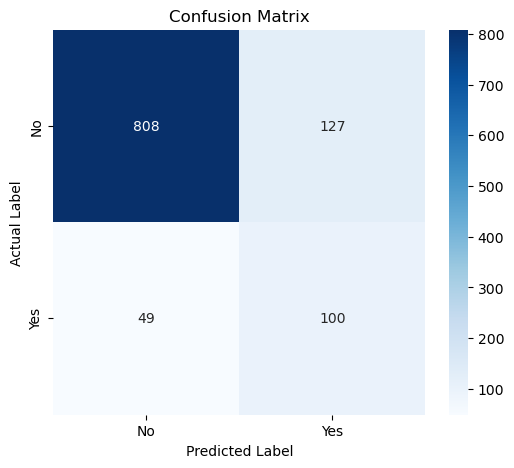

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.84
Precision: 0.44
Recall: 0.67
F-score: 0.53
Specificity: 0.86
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 100
True negatives: 808
False positives: 127
False negatives: 49


In [20]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

127

In [21]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

49

# Save the evaluation df

In [22]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,cohere.command-r-plus-v1:0,1612,95,yes,1.0,The text explicitly states that the original d...,Here is the response in the requested JSON for...
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,cohere.command-r-plus-v1:0,1331,67,no,1.0,There is no indication in the provided text th...,"{\n""overruled"": ""no"",\n""confidence"": 1.0,\n""ra..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,cohere.command-r-plus-v1:0,850,80,no,0.9,While the case of Murray v. Lardner is mention...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,cohere.command-r-plus-v1:0,809,84,no,0.9,The passage mentions the case <targetCase>10 W...,"{\n""overruled"": ""no"",\n""confidence"": 0.9,\n""ra..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,cohere.command-r-plus-v1:0,812,82,no,1.0,The passage does not contain any explicit or i...,"{\n""overruled"": ""no"",\n""confidence"": 1,\n""rati..."


In [23]:
eval_df.to_csv("predictions/2.cohere/2.commandR+_baseline_eval.csv", index=False)